# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as s
import statsmodels.api as sm
from scipy.stats import t
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 2. Collect and load data

In [30]:
city=pd.read_csv("bigcity.csv")
city.head(5)

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# 3. Explore numeric variables - five number summary

In [31]:
city_num=city.select_dtypes(include=np.number)
city_num.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

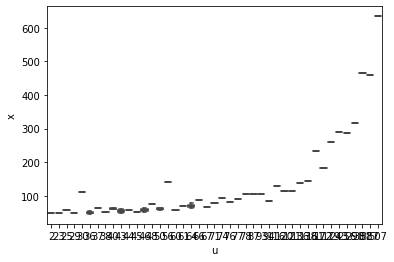

In [32]:
# 3a. Visualizing numeric variables in boxplot and histogram:

sb.boxplot(city_num['u'],city_num['x'])

(array([20., 15.,  5.,  3.,  1.,  2.,  0.,  2.,  0.,  1.]),
 array([  2. ,  52.5, 103. , 153.5, 204. , 254.5, 305. , 355.5, 406. ,
        456.5, 507. ]),
 <a list of 10 Patch objects>)

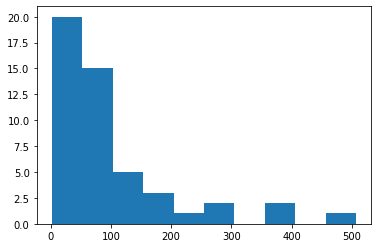

In [33]:
plt.hist(city_num['u'])

(array([31.,  9.,  1.,  2.,  3.,  0.,  0.,  2.,  0.,  1.]),
 array([ 46. , 104.8, 163.6, 222.4, 281.2, 340. , 398.8, 457.6, 516.4,
        575.2, 634. ]),
 <a list of 10 Patch objects>)

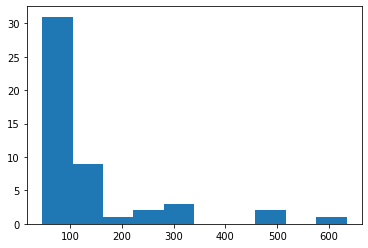

In [12]:
plt.hist(city_num['x'])

In [34]:
# 3b. Measure spread – variance and standard deviation:

print("Variance of column u is ",np.var(city_num['u']))
print("Standard deviation of u is",np.std(city_num['u']))
print("Variance of column u is ",np.var(city_num['x']))
print("Standard deviation of x is",np.std(city_num['x']))

Variance of column u is  10677.959183673465
Standard deviation of u is 103.33421110006823
Variance of column u is  14849.468554768846
Standard deviation of x is 121.85839550383406


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

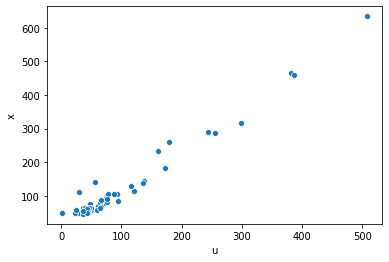

In [35]:
sb.scatterplot(city_num['u'],city_num['x'])

In [36]:
pd.crosstab(city_num['u'],city_num['x'])

x,46,48,50,52,53,54,57,58,60,61,...,143,183,232,260,288,291,317,459,464,634
u,,,,,,,,,,,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [42]:
print("Number of rows in the dataset:",len(city_num))
X = city_num['u']
Y = city_num['x']
X = pd.Series(X,index=X.index)
Y = pd.Series(Y,index=Y.index)
print(X)
print(Y)

Number of rows in the dataset: 49
0     138
1      93
2      61
3     179
4      48
5      37
6      29
7      23
8      30
9       2
10     38
11     46
12     71
13     25
14    298
15     74
16     50
17     76
18    381
19    387
20     78
21     60
22    507
23     50
24     77
25     64
26     40
27    136
28    243
29    256
30     94
31     36
32     45
33     67
34    120
35    172
36     66
37     46
38    121
39     44
40     64
41     56
42     40
43    116
44     87
45     43
46     43
47    161
48     36
Name: u, dtype: int64
0     143
1     104
2      69
3     260
4      75
5      63
6      50
7      48
8     111
9      50
10     52
11     53
12     79
13     57
14    317
15     93
16     58
17     80
18    464
19    459
20    106
21     57
22    634
23     64
24     89
25     77
26     60
27    139
28    291
29    288
30     85
31     46
32     53
33     67
34    115
35    183
36     86
37     65
38    113
39     58
40     63
41    142
42     64
43    130
44    105
45  

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [43]:
city_num.isnull().sum()

Unnamed: 0    0
u             0
x             0
dtype: int64

In [44]:
city_num.corr()

,Unnamed: 0,u,x
Unnamed: 0,1.000000,-0.024788,-0.047890
u,-0.024788,1.000000,0.981742
x,-0.047890,0.981742,1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y= train_test_split(city_num[['Unnamed: 0','u']],
                                               city_num['x'],
                                               test_size=0.2,
                                               random_state=1)
#train_x.shape, test_x.shape, train_y.shape, test_y.shape

#X = sm.add_constant(adv[['TV','radio']])

scaler = StandardScaler().fit(train_x)
train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)

df_train_x_scaled = pd.DataFrame(train_x_scaled,index=train_x.index, columns= train_x.columns)
df_test_x_scaled = pd.DataFrame(test_x_scaled,index=test_x.index, columns=test_x.columns)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [47]:
X = sm.add_constant(df_train_x_scaled)
y = train_y
model = sm.OLS(y,X).fit()
model.summary()

C:\Users\M.NITHIN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     550.9
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           1.01e-27
Time:                        17:50:27   Log-Likelihood:                -177.86
No. Observations:                  39   AIC:                             361.7
Df Residuals:                      36   BIC:                             366.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.9744      3.856     33.705      0.000     122.154     137.795
Unnamed: 0    -1.5556      3.861     -0.403      0.689      -9.386       6.275
u            128.0686      3.861     33.171      0.000     120.238     135.899
==============================================================================
Omnibus:                       13.453   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.176
Skew:                           1.202   Prob(JB):                     0.000835
Kurtosis:                       4.716   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
X = sm.add_constant(df_test_x_scaled)
test_y_pred = model.predict(X)

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

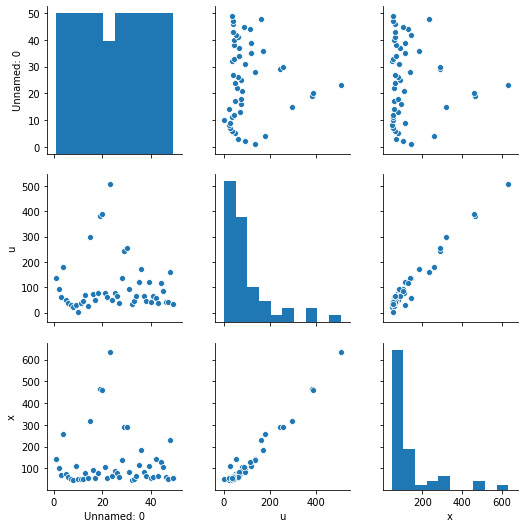

In [49]:
sb.pairplot(city_num)

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [53]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_y,test_y_pred,squared=False)
print("Root Mean Squared Error is:",rmse)
# From the above summary table, R-square value is shown as 0.968

Root Mean Squared Error is: 22.82929588664945


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [ ]:
# Accuracy is represented as explained part of the overall SST which is R-square. The value of R-square is 0.968 . So accuracy is 96.80%